In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_geolocation = pd.read_csv("olist_geolocation_dataset.csv")
df_items = pd.read_csv("olist_order_items_dataset.csv")
df_payments = pd.read_csv("olist_order_payments_dataset.csv")
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
df_translation = pd.read_csv("product_category_name_translation.csv")

In [4]:
df = df_customers.merge(df_orders, on = 'customer_id') \
                .merge(df_items, on = 'order_id') \
                .merge(df_payments, on = 'order_id') \
                .merge(df_reviews, on = 'order_id') \
                .merge(df_products, on = 'product_id') \
                .merge(df_translation, on = 'product_category_name') \
                .merge(df_sellers, on = 'seller_id')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP


In [5]:
df.shape

(115609, 40)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  order_item_id                 

<AxesSubplot: >

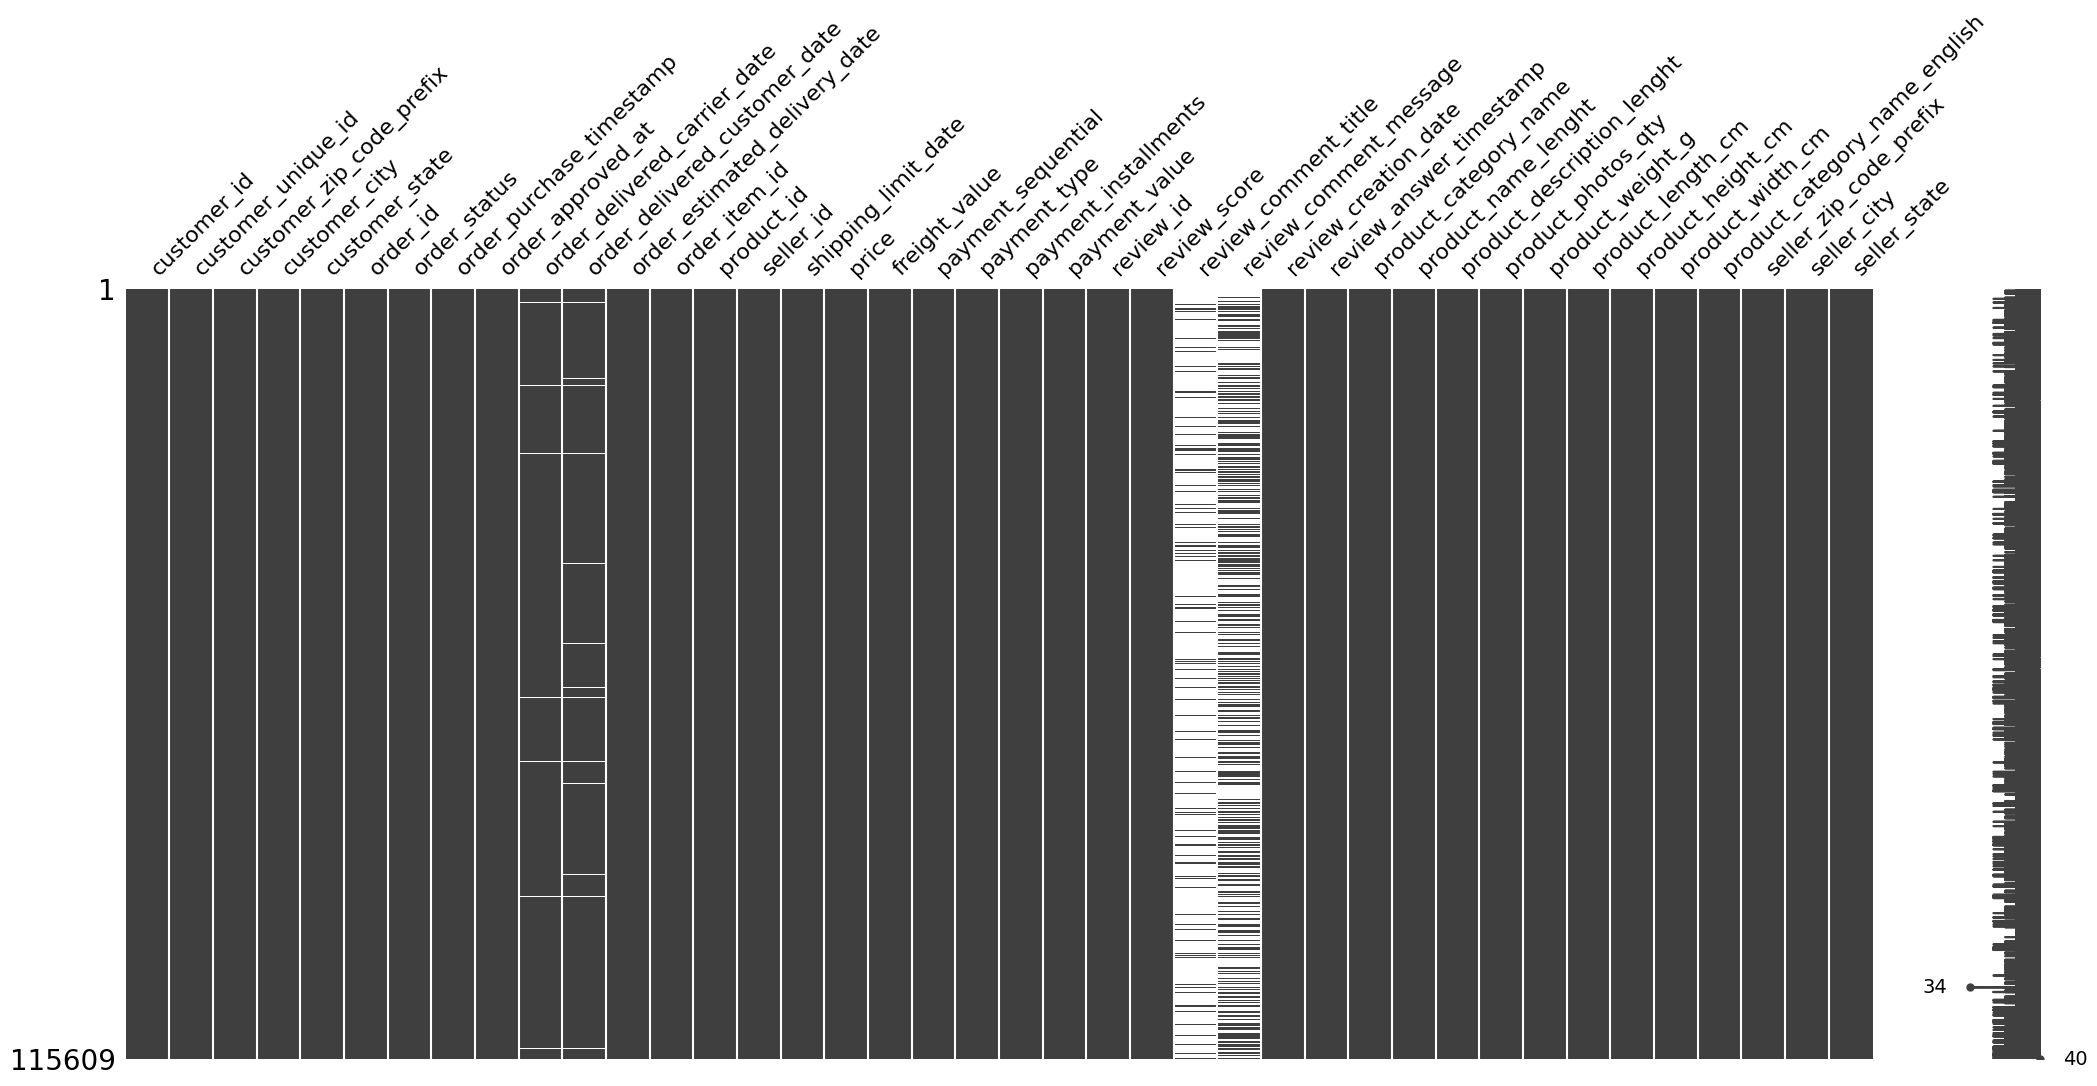

In [7]:
%matplotlib inline
msno.matrix(df)

In [8]:
df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
count,115609,115609,115609.000000,115609,115609,115609,115609,115609,115595,114414,113209,115609,115609.000000,115609,115609,115609,115609.000000,115609.000000,115609.000000,115609,115609.000000,115609.000000,115609,115609.000000,13801,48906,115609,115609,115609,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609,115609.000000,115609,115609
unique,96516,93396,NaN,4093,27,96516,7,95989,88332,79241,93702,449,NaN,32171,3028,91386,NaN,NaN,NaN,4,NaN,NaN,96319,NaN,4477,35176,632,96163,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,604,23
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table,NaN,sao paulo,SP
freq,63,75,NaN,18267,48797,63,113210,63,63,63,63,649,NaN,533,2128,63,NaN,NaN,NaN,85278,NaN,NaN,63,NaN,489,253,531,63,11847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11847,NaN,28811,82417
mean,NaN,NaN,35061.537597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.194535,NaN,NaN,NaN,120.619850,20.056880,1.093747,NaN,2.946233,172.387379,NaN,4.034409,NaN,NaN,NaN,NaN,NaN,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,NaN,24515.713958,NaN,NaN
std,NaN,NaN,29841.671732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.685926,NaN,NaN,NaN,182.653476,15.836184,0.729849,NaN,2.781087,265.873969,NaN,1.385584,NaN,NaN,NaN,NaN,NaN,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,NaN,27636.640968,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN,1001.000000,NaN,NaN
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,1.000000,NaN,1.000000,60.870000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,6429.000000,NaN,NaN
50%,NaN,NaN,24241.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,74.900000,16.320000,1.000000,NaN,2.000000,108.050000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,13660.000000,NaN,NaN
75%,NaN,NaN,58745.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,134.900000,21.210000,1.000000,NaN,4.000000,189.480000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,28605.000000,NaN,NaN


In [9]:
for feature in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date',
                'review_creation_date', 'review_answer_timestamp']:
    df[feature] = pd.to_datetime(df[feature])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115609 non-null  object        
 1   customer_unique_id             115609 non-null  object        
 2   customer_zip_code_prefix       115609 non-null  int64         
 3   customer_city                  115609 non-null  object        
 4   customer_state                 115609 non-null  object        
 5   order_id                       115609 non-null  object        
 6   order_status                   115609 non-null  object        
 7   order_purchase_timestamp       115609 non-null  datetime64[ns]
 8   order_approved_at              115595 non-null  datetime64[ns]
 9   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 10  order_delivered_customer_date  113209 non-null  datetime64[ns]
 11  

In [11]:
best_categ = df.groupby(df['product_category_name_english'])['order_id']\
                    .nunique().reset_index().sort_values('order_id', ascending = False).head(10)

In [12]:
fig = px.bar(best_categ, y='product_category_name_english', x='order_id', color_continuous_scale='viridis')
fig.update_layout(title= 'Meilleures ventes par catégorie')
fig.update_xaxes(title= "Nombre d'unités vendues")
fig.update_yaxes(title= "Catégories")
fig.show()

In [13]:
df.to_csv("all_in_one.csv")